# PROJECT 1 RECAP

In the first iteration of Project 1 with the Nextflix dataset, I had done some data exploration and visualization. Then I moved on to concentrating on South America, where the top three directors worked mainly in Stand-up and TV-MA movies.

In this updated Project 1, I have scraped two datasets from imdb and have added them to make one huge dataset with the netflix data. I provide new visualization, and attempt a simple machine learning algorithm to attempt to predict the class of rating the movie/tv show belongs to.

In [1]:
import numpy as np 
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# **NETFLIX DATASET**

In [2]:
netflix = pd.read_csv('netflix_titles.csv')

In [3]:
netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## DATA CLEANING

### Null Values

In [5]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
for i in netflix.columns:
    null_rate = netflix[i].isna().sum() / len(netflix) * 100 
    if null_rate > 0 :
        print(f"'{i}' column NaN rate: {round(null_rate,2)}%")

'director' column NaN rate: 30.68%
'cast' column NaN rate: 9.22%
'country' column NaN rate: 6.51%
'date_added' column NaN rate: 0.13%
'rating' column NaN rate: 0.09%


For the 'director', 'cast', 'country' and 'rating' columns, I've decided to replace the null values with 'not available'.

In [7]:
netflix['director'].replace(np.nan, 'not available', inplace=True)
netflix['cast'].replace(np.nan, 'not available', inplace=True)
netflix['country'].replace(np.nan, 'not available', inplace=True)
netflix['rating'].replace(np.nan, 'not available', inplace=True)

In [8]:
netflix.dropna(inplace=True)

### Netflix Titles

Different countries have different rules about handling titles. For example, English titles often have uppercase for nouns but not for verbs, or only the first word is capitalized in a French movie title, etc. To uniform them, I change all titles to lowercase.

In [9]:
netflix['title'] = netflix['title'].str.lower()

# **IMDB DATASET**

This section consists of webscraping two csv files with basic and ratings information, and performing data cleaning. Then I merge them into a "imdb" df, which is in turn followed by the merging of the netflix and imdb dfs into one df.

In [10]:
urls = ['https://datasets.imdbws.com/title.ratings.tsv.gz','https://datasets.imdbws.com/title.basics.tsv.gz']
for url in urls:
    r=requests.get(url)
    with open(url.split('/')[-1], 'wb') as fd:
        for chunk in r.iter_content(chunk_size=128):
            fd.write(chunk)

In [11]:
basics_df = pd.read_csv('title.basics.tsv.gz',sep='\t')
ratings_df = pd.read_csv('title.ratings.tsv.gz',sep='\t')

/Users/celia/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## DATA CLEANING BASIC INFO

In [12]:
basics_df.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"


### Null Values

In [13]:
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848093 entries, 0 to 7848092
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 538.9+ MB


In [14]:
basics_df.isnull().sum()

tconst             0
titleType          0
primaryTitle       9
originalTitle      9
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            10
dtype: int64

The columns 'primaryTitle' and 'originalTitle' have the same null values. I will drop them futher below.

In [15]:
# creating bool series True for NaN values in 'primaryTitle'  
primaryTitle_nulls = pd.isnull(basics_df['primaryTitle'])  
      
# these rows have nulls for 'primaryTitle' and 'originalTitle'
basics_df[primaryTitle_nulls]  

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1419263,tt10790040,tvEpisode,NaN,NaN,0,2019,\N,\N,\N
3408528,tt14273442,tvEpisode,NaN,NaN,0,2021,\N,\N,"Action,Thriller"
3545333,tt14510930,tvEpisode,NaN,NaN,0,\N,\N,\N,\N
4055268,tt1971246,tvEpisode,NaN,NaN,0,2011,\N,\N,Biography
4147815,tt2067043,tvEpisode,NaN,NaN,0,1965,\N,\N,Music
5921715,tt5773048,tvEpisode,NaN,NaN,0,2015,\N,\N,Talk-Show
7166859,tt8473688,tvEpisode,NaN,NaN,0,1987,\N,\N,Drama
7198567,tt8541336,tvEpisode,NaN,NaN,0,2018,\N,\N,"Reality-TV,Romance"
7804042,tt9824302,tvEpisode,NaN,NaN,0,2016,\N,\N,Documentary


For most rows with null 'genres' values, the information seems to be in the 'runtimeMinutes' column.

In [16]:
# creating bool series True for NaN values in 'genres'  
genres_nulls = pd.isnull(basics_df['genres'])  
      
# rows where 'primaryTitle' = NaN  
basics_df[genres_nulls]  

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1101618,tt10233364,tvEpisode,Rolling in the Deep Dish\tRolling in the Deep ...,0,2019,\N,\N,Reality-TV,NaN
1523020,tt10970874,tvEpisode,Die Bauhaus-Stadt Tel Aviv - Vorbild für die M...,0,2019,\N,\N,\N,NaN
1921099,tt11670006,tvEpisode,...ein angenehmer Unbequemer...\t...ein angene...,0,1981,\N,\N,Documentary,NaN
2034826,tt11868642,tvEpisode,GGN Heavyweight Championship Lungs With Mike T...,0,2020,\N,\N,Talk-Show,NaN
2195178,tt12149332,tvEpisode,Jeopardy! College Championship Semifinal Game ...,0,2020,\N,\N,Game-Show,NaN
2346064,tt12415330,tvEpisode,Anthony Davis High Brow Tank\tAnthony Davis Hi...,0,2017,\N,\N,Reality-TV,NaN
3082020,tt13704268,tvEpisode,Bay of the Triffids/Doctor of Doom\tBay of the...,0,\N,\N,\N,"Animation,Comedy,Family",NaN
5124663,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",0,2014,\N,\N,Reality-TV,NaN
7803332,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,\N,\N,\N,NaN
7844433,tt9909210,tvEpisode,Politik und/oder Moral - Wie weit geht das Ver...,0,2005,\N,\N,\N,NaN


So here I replace the nulls in 'genres' with the information available in 'runtimeMinutes'.

In [17]:
basics_df['genres'].fillna(basics_df['runtimeMinutes'], inplace=True)

In [18]:
# double check
basics_df.iloc[[1101618, 2346064, 7844433]]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1101618,tt10233364,tvEpisode,Rolling in the Deep Dish\tRolling in the Deep ...,0,2019,\N,\N,Reality-TV,Reality-TV
2346064,tt12415330,tvEpisode,Anthony Davis High Brow Tank\tAnthony Davis Hi...,0,2017,\N,\N,Reality-TV,Reality-TV
7844433,tt9909210,tvEpisode,Politik und/oder Moral - Wie weit geht das Ver...,0,2005,\N,\N,\N,\N


In [19]:
basics_df.dropna(inplace=True)

In [20]:
basics_df.isnull().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

### Fixing Unique Values

In [21]:
basics_df['startYear'].unique()

array([1894, 1892, 1893, 1895, 1896, 1898, 1897, 1900, 1899, 1901, 1902,
       1903, 1905, 1904, 1912, 1907, 1906, 1908, 1910, 1909, 1914, 1911,
       1913, 1915, 1919, 1916, 1917, 1918, 1936, 1925, 1920, 1922, 1921,
       1923, 2019, 1924, 1928, 1926, 1927, 1929, 2000, 1993, 1935, 2014,
       1930, 2004, 1942, 2011, 1934, 1931, 1932, 1939, 1937, 1933, 1950,
       1938, 1951, 1945, 1946, 1940, 1944, 1949, 1947, 1941, 1952, 1970,
       1957, 1943, 1959, 1948, 2001, 1953, 2008, 1954, 1965, 1983, 1980,
       1973, 1961, 1995, 1955, 1962, 1958, 1956, 1977, 1960, 1964, 1967,
       1968, 1963, 1969, 1985, 1971, 1972, 1966, 2021, 1976, 1990, 1986,
       2020, 1979, 1974, 1978, 1981, 1988, 1975, 1989, '1971', '1970',
       '1967', '1973', '1972', '1974', '1976', '1969', '1968', '1985',
       '\\N', '1981', '2009', '1980', '1986', '1965', '1987', '1975',
       '1978', '1977', '2010', '2018', '1979', '1989', '1988', '1984',
       '1966', '1983', '1982', '1992', '1991', '1997', '1952

In [22]:
# to remove '\\N'
basics_df = basics_df.loc[basics_df.startYear.apply(lambda x: str(x).isnumeric())]

# to int
basics_df['startYear'] = basics_df['startYear'].astype(int)

## DATA CLEANING RATING INFO

In [23]:
ratings_df.head(3)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1697
1,tt0000002,6.1,210
2,tt0000003,6.5,1454


### Null Values

There are no null values in ratings_df

In [24]:
ratings_df.isnull().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

## MERGING TO MAKE IMDB

In [25]:
imdb = pd.merge(basics_df.set_index('tconst'), ratings_df.set_index('tconst'), left_index=True, right_index=True).drop_duplicates()

In [26]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145649 entries, tt0000001 to tt9916778
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   titleType       1145649 non-null  object 
 1   primaryTitle    1145649 non-null  object 
 2   originalTitle   1145649 non-null  object 
 3   isAdult         1145649 non-null  object 
 4   startYear       1145649 non-null  int64  
 5   endYear         1145649 non-null  object 
 6   runtimeMinutes  1145649 non-null  object 
 7   genres          1145649 non-null  object 
 8   averageRating   1145649 non-null  float64
 9   numVotes        1145649 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 96.1+ MB


### IMDB Titles

Like for the Netflix dataset, I change all titles to lowercase.

In [27]:
imdb['primaryTitle'] = imdb['primaryTitle'].str.lower()

In [28]:
imdb['originalTitle'] = imdb['originalTitle'].str.lower()

In [29]:
imdb.tail()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt9916682,tvEpisode,horrid henry it's all your fault,horrid henry it's all your fault,0,2012,\N,10,"Animation,Comedy,Family",5.6,5
tt9916690,tvEpisode,horrid henry delivers the milk,horrid henry delivers the milk,0,2012,\N,10,"Animation,Comedy,Family",6.6,5
tt9916720,short,the nun 2,the nun 2,0,2019,\N,10,"Comedy,Horror,Mystery",6.4,78
tt9916766,tvEpisode,episode #10.15,episode #10.15,0,2019,\N,43,"Family,Reality-TV",6.9,16
tt9916778,tvEpisode,escape,escape,0,2019,\N,\N,"Drama,Mystery,Romance",7.5,27


# DF

Merging Netflix and IMDB into one df.

In [30]:
df = pd.merge(netflix, imdb, left_on=['title','release_year'], right_on=['primaryTitle','startYear'])
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,movie,7:19,7:19,0,2016,\N,94,"Drama,History",5.9,581


## DATA CLEANING DF

### Dropping extra columns

Drop columns that are redundant or not needed.

In [31]:
df.drop(columns=['show_id', 'cast', 'date_added', 'duration',
                 'listed_in','description', 'titleType', 'primaryTitle',
                 'originalTitle','isAdult','startYear', 'endYear'],inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6270 entries, 0 to 6269
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            6270 non-null   object 
 1   title           6270 non-null   object 
 2   director        6270 non-null   object 
 3   country         6270 non-null   object 
 4   release_year    6270 non-null   int64  
 5   rating          6270 non-null   object 
 6   runtimeMinutes  6270 non-null   object 
 7   genres          6270 non-null   object 
 8   averageRating   6270 non-null   float64
 9   numVotes        6270 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 538.8+ KB


### 'type' column

In [33]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [34]:
df['movie'] = df['type'].map({'TV Show':0, 'Movie':1})

### 'runtimeMinutes' column

In [35]:
# to numeric

df['runtimeMinutes'].unique()
# to remove '\\N'
df = df.loc[df.runtimeMinutes.apply(lambda x: str(x).isnumeric())]

# to int
df['runtimeMinutes'] = df['runtimeMinutes'].astype(int)

### Dealing with co-produced titles in 'country'

In [36]:
df.drop(df[df.country == 'not available'].index, inplace=True)

In [37]:
df['country'] = df['country'].str.split(', ')
df_countries = (
    df.explode('country')
    .reset_index(drop=False)
)

In [38]:
df_countries.tail(3)

,index,type,title,director,country,release_year,rating,runtimeMinutes,genres,averageRating,numVotes,movie
6865,6269,Movie,zz top: that little ol' band from texas,Sam Dunn,United Kingdom,2019,TV-MA,91,"Biography,Documentary,Music",7.5,1296,1
6866,6269,Movie,zz top: that little ol' band from texas,Sam Dunn,Canada,2019,TV-MA,91,"Biography,Documentary,Music",7.5,1296,1
6867,6269,Movie,zz top: that little ol' band from texas,Sam Dunn,United States,2019,TV-MA,91,"Biography,Documentary,Music",7.5,1296,1


In [39]:
df_countries['country'].unique()

array(['Mexico', 'Singapore', 'United States', 'Egypt', 'India', 'Poland',
       'Thailand', 'South Korea', 'Canada', 'Indonesia', 'Spain',
       'Turkey', 'South Africa', 'Nigeria', 'France', 'Portugal',
       'Hong Kong', 'China', 'Germany', 'Italy', 'United Kingdom',
       'Serbia', 'Denmark', 'Romania', 'New Zealand', 'Australia',
       'Taiwan', 'Netherlands', 'Argentina', 'Philippines',
       'United Arab Emirates', 'Brazil', 'Iran', 'Israel', 'Japan',
       'Bulgaria', 'Iceland', 'Chile', 'Russia', 'Lebanon', 'Uruguay',
       'Sweden', 'Malaysia', 'Ireland', 'Colombia', 'Luxembourg',
       'Belgium', 'Austria', 'Norway', 'Senegal', 'Switzerland', 'Ghana',
       'Pakistan', 'Saudi Arabia', 'Armenia', 'Jordan', 'Mongolia',
       'Namibia', 'Qatar', 'Vietnam', 'Malta', 'Czech Republic',
       'Bahamas', 'Sri Lanka', 'Bangladesh', 'Zimbabwe', 'Hungary',
       'Finland', 'Latvia', 'Kenya', 'Algeria', 'Liechtenstein',
       'Venezuela', 'Peru', 'Cambodia', 'Albania', 'Ni

In [40]:
df['country'].replace('Cambodia,', 'Cambodia', inplace=True)
df['country'].replace('West Germany', 'Germany', inplace=True)
df['country'].replace('Vatican City', 'Italy', inplace=True)
df['country'].replace('United Kingdom,', 'United Kingdom', inplace=True)
df['country'].replace('East Germany', 'Germany', inplace=True)

In [41]:
asia = ['India', 'Singapore', 'Thailand', 'South Korea', 'Indonesia', 'Hong Kong', 'China', 'Taiwan',
        'United Arab Emirates', 'Iran', 'Israel', 'Japan', 'Lebanon', 'Russia', 'Malaysia', 'Pakistan',
        'Saudi Arabia', 'Armenia', 'Jordan', 'Mongolia', 'Qatar', 'Vietnam', 'Sri Lanka', 'Bangladesh',
        'Cambodia', 'Kuwait', 'Nepal', 'Azerbaijan', 'Iraq', 'Kazakhstan', 'Afghanistan', 'Philippines']

europe = ['Poland', 'Spain', 'Turkey', 'France', 'Portugal', 'Germany', 'Italy', 'United Kingdom',
       'Serbia', 'Denmark', 'Romania', 'Netherlands', 'Bulgaria', 'Iceland', 'Lebanon', 'Sweden', 'Ireland',
          'Luxembourg','Belgium', 'Austria', 'Norway', 'Switzerland', 'Malta', 'Czech Republic', 'Hungary',
       'Finland', 'Latvia', 'Liechtenstein', 'Albania', 'Greece', 'Croatia', 'Slovenia', 'Georgia', 'Vatican City',
          'Lithuania', 'Ukraine', 'Montenegro']
          

africa = ['Egypt', 'South Africa', 'Nigeria', 'Senegal', 'Ghana', 'Namibia', 'Zimbabwe', 'Kenya', 'Algeria',
          'Morocco', 'Botswana', 'Angola', 'Malawi', 'Somalia', 'Sudan', 'Uganda']


oceanie = ['Australia']

north_america = ['Canada', 'Mexico', 'United States', 'Bahamas', 'Bermuda', 'Guatemala', 'Nicaragua', 'Puerto Rico', 'Jamaica', 'Panama']

south_america = ['Argentina', 'Bolivia', 'Brazil', 'Chile',
                 'Colombia', 'Ecuador', 'Falkland Islands',
                 'French Guiana', 'Guyana', 'Paraguay', 'Peru',
                 'Suriname', 'Uruguay', 'Venezuela']


def GetConti(country):
    if country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in africa:
        return "Africa"
    elif country in north_america:
        return "North America"
    elif country in south_america:
        return "South America"
    else:
        return "Oceanie"

df_countries['continent'] = df_countries['country'].apply(lambda x: GetConti(x))

### Dealing with multiple 'genres'

In [42]:
df_countries['genres'].unique()

array(['Drama,History', 'Horror', 'Action,Adventure,Animation',
       'Comedy,Drama,Short', 'Crime,Drama,History', 'Horror,Thriller',
       'Comedy', 'Thriller', 'Horror,Mystery,Romance',
       'Crime,Drama,Horror', 'Crime,Drama,Thriller', 'Documentary',
       'Sci-Fi', 'Action,Drama,Horror', 'Biography,Comedy,Drama',
       'Comedy,Drama,Romance', 'Comedy,Romance',
       'Action,Adventure,Sci-Fi', 'Drama,Family', 'Drama,Romance,Sport',
       'Adventure,Comedy,Romance', 'Comedy,Drama',
       'Comedy,History,Romance', 'Comedy,Family', 'Drama', 'Drama,Sport',
       'Crime,Documentary,History', 'Action,History,Thriller',
       'Action,Drama,Thriller', 'Comedy,Drama,Fantasy',
       'Drama,History,War', 'Drama,Horror,Thriller',
       'Biography,Documentary,History', 'Music', 'Action,Sci-Fi,Thriller',
       'Drama,Thriller', 'Comedy,Musical', 'Action,Comedy,Crime',
       'Biography,Drama', 'Drama,Romance', 'Biography,Documentary,Drama',
       'Adventure,Animation,Comedy', 'Dram

In [43]:
df_countries['genres'] = df_countries['genres'].str.split(',')
df_genres = (
    df_countries.explode('genres')
    .reset_index(drop=False)
)

In [44]:
df_genres['genres'].unique()

array(['Drama', 'History', 'Horror', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Short', 'Crime', 'Thriller', 'Mystery', 'Romance',
       'Documentary', 'Sci-Fi', 'Biography', 'Family', 'Sport', 'Fantasy',
       'War', 'Music', 'Musical', 'Talk-Show', '\\N', 'Reality-TV',
       'Game-Show', 'Western', 'News', 'Adult'], dtype=object)

In [45]:
df_genres['genres'].replace('\\N', 'Unknown', inplace=True)

### Dealing with rating column

Since the 'type' column already specifies if the title is a 'Movie' = 1 or 'TV Show' = 0, there is no need to have 'TV' specified in the ratings.

To reduce the number of ratings, I combine similar ratings, then rename the column 'age_rating'.

In [46]:
df_genres['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'NR', 'TV-G', 'TV-PG', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'TV-Y7-FV', 'UR', 'not available', 'NC-17'],
      dtype=object)

In [47]:
df_genres['rating'].replace('TV-MA', 'R', inplace=True)
df_genres['rating'].replace('PG-13', '14', inplace=True)
df_genres['rating'].replace('TV-14', '14', inplace=True)
df_genres['rating'].replace('TV-G', 'G', inplace=True)
df_genres['rating'].replace('TV-PG', 'PG', inplace=True)
df_genres['rating'].replace('TV-Y', 'Y', inplace=True)
df_genres['rating'].replace('TV-Y7', 'Y7', inplace=True)
df_genres['rating'].replace('TV-Y7-FV', 'Y7', inplace=True)

In [48]:
# change column name
df_genres.rename(columns = {'rating':'age_rating'}, inplace = True)
df_genres.rename(columns = {'averageRating':'imdb_rating'}, inplace = True)

In [49]:
df_genres['age_rating'].unique()

array(['R', '14', 'NR', 'G', 'PG', 'Y', 'Y7', 'UR', 'not available',
       'NC-17'], dtype=object)

### Dealing with 'averageRating' column

I divide into subclasses and rename the 'averageRating' column to 'imdb_rating'.

In [50]:
df_genres['imdb_rating'].unique()

array([5.9, 4.6, 7.1, 5.4, 6.8, 7.5, 5.3, 6.4, 6.3, 7.8, 4.5, 6.6, 6.2,
       5.2, 5.1, 3.8, 4.4, 5.5, 4.8, 7.6, 6.7, 4.7, 7.3, 8.3, 5.6, 6.5,
       5.8, 3.3, 6.9, 7.4, 6.1, 8.4, 7.2, 2.6, 3.2, 7. , 3.9, 1.8, 4.2,
       6. , 8.1, 5.7, 3. , 5. , 8.7, 8. , 3.1, 7.9, 7.7, 1.5, 9. , 8.2,
       2.8, 8.5, 3.7, 2.9, 3.6, 2.7, 4.9, 9.3, 8.9, 8.6, 2.1, 8.8, 3.5,
       4. , 2.4, 4.1, 4.3, 2.5, 2.3, 9.8, 9.2, 3.4, 2.2, 9.1, 1.7, 1.6,
       1.9, 9.5, 9.6, 9.4])

In [51]:
# function to apply to 'imdb_rating'

def rating(score):
    if score <= 3:
        return 1
    elif score > 3 and score <= 5:
        return 2
    elif score > 5 and score <= 6:
        return 3
    elif score > 6 and score <= 8.5:
        return 4
    else:
        return 5

In [52]:
df_genres.loc[:, 'imdb_rating'] = df_genres.loc[:, 'imdb_rating'].apply(rating)

In [53]:
df_genres['imdb_rating'].unique()

array([3, 2, 4, 1, 5])

In [54]:
df_final = df_genres[['title', 'director', 'movie', 'age_rating',
                      'country', 'continent', 'release_year', 'runtimeMinutes', 
                      'genres', 'numVotes', 'imdb_rating']]

# FINAL DF

In [55]:
df_final.head(3)

,title,director,movie,age_rating,country,continent,release_year,runtimeMinutes,genres,numVotes,imdb_rating
0,7:19,Jorge Michel Grau,1,R,Mexico,North America,2016,94,Drama,581,3
1,7:19,Jorge Michel Grau,1,R,Mexico,North America,2016,94,History,581,3
2,23:59,Gilbert Chan,1,R,Singapore,Asia,2011,78,Horror,860,2


## VISUALIZATION

The count per continent:

In [56]:
grouped = df_final.groupby('continent')['title'].count().reset_index()
grouped.sort_values('title', ascending=False)

,continent,title
3,North America,6649
1,Asia,3857
2,Europe,3595
0,Africa,411
4,Oceanie,302
5,South America,296


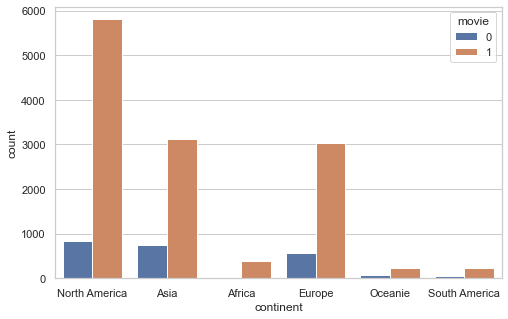

In [57]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(x='continent', data=df_final, hue='movie')
plt.show()

There do not seem to be strong correlations between the columns.

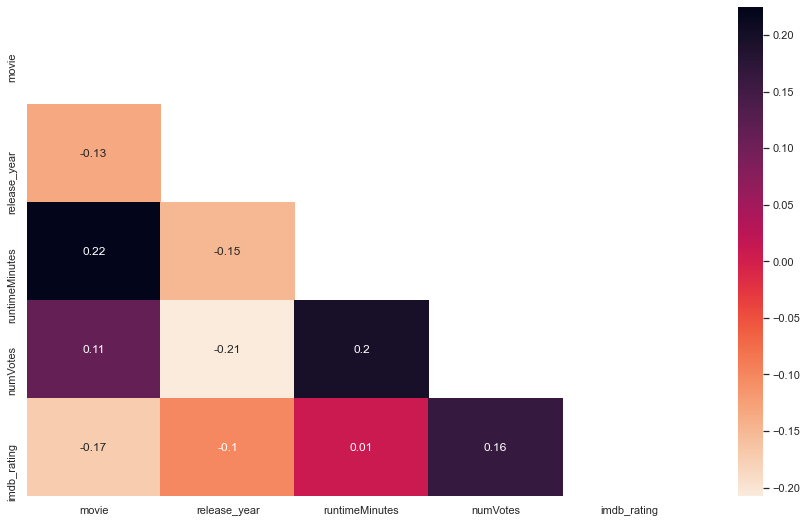

In [58]:
corr = df_final.corr()

# getting the upper triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, mask=matrix, cmap='rocket_r');

# last row shows the corr specific to 'Rain Toromorrow'

The strongest correlation with 'imdb_rating' is a negative one with 'movie'.

In [59]:
numeric_df = df_final.select_dtypes(exclude='object')

In [60]:
numeric_df.corr()['imdb_rating'][:-1].sort_values()

movie            -0.170761
release_year     -0.099554
runtimeMinutes    0.010193
numVotes          0.163354
Name: imdb_rating, dtype: float64

It is difficult to see patterns in a pairplot because of the mutiple classes.

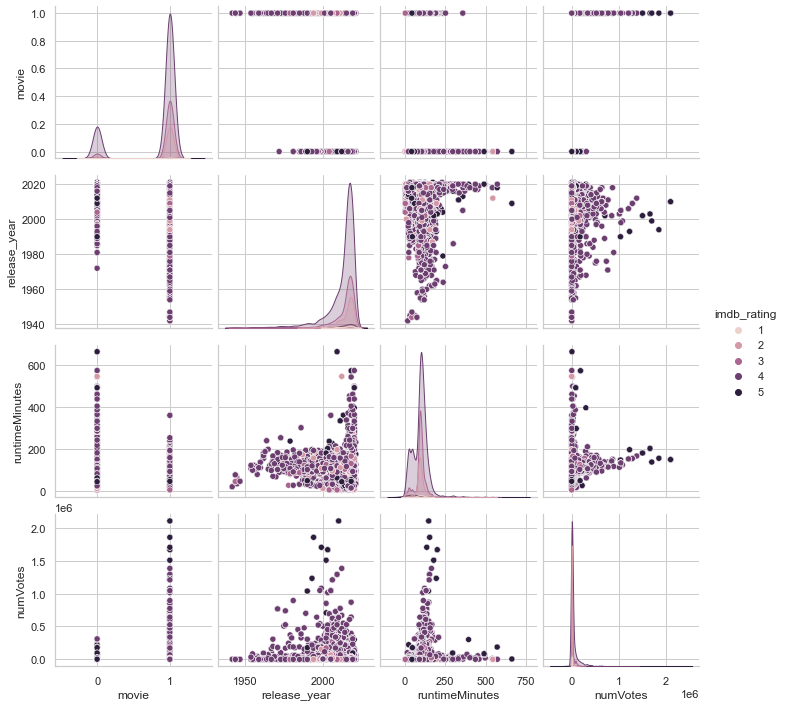

In [61]:
sns.pairplot(numeric_df,hue='imdb_rating')

Different counts by 'imdb_rating'. The highest count is by far class 4.

<AxesSubplot:xlabel='imdb_rating', ylabel='count'>

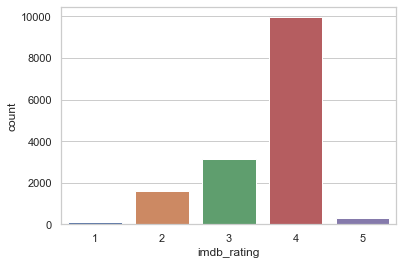

In [62]:
sns.countplot(data= df_final, x='imdb_rating')

# PREDICTING imdb_rating

## TRAIN | TEST SPLIT

In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           15110 non-null  object
 1   director        15110 non-null  object
 2   movie           15110 non-null  int64 
 3   age_rating      15110 non-null  object
 4   country         15110 non-null  object
 5   continent       15110 non-null  object
 6   release_year    15110 non-null  int64 
 7   runtimeMinutes  15110 non-null  int64 
 8   genres          15110 non-null  object
 9   numVotes        15110 non-null  int64 
 10  imdb_rating     15110 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.3+ MB


In [64]:
X = pd.get_dummies(df_final.drop(['title', 'director', 'country', 'imdb_rating'],axis=1),drop_first=True)
y = df_final['imdb_rating']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## RANDOM FOREST CLASSIFIER

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model = RandomForestClassifier(n_estimators=15,max_features='auto',random_state=42)

In [70]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15, random_state=42)

In [71]:
y_pred_rf = model.predict(X_test)

## MODEL METRICS

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [73]:
accuracy_score(y_test,y_pred_rf)

0.7385837193911317

In [74]:
confusion_matrix(y_test,y_pred_rf)

array([[   1,    5,   10,   17,    0],
       [   5,  214,  108,  166,    2],
       [   1,   91,  402,  441,    0],
       [   2,   72,  190, 2706,    8],
       [   0,    2,    4,   61,   25]])

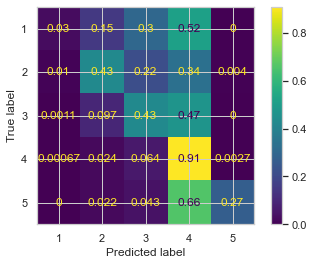

In [75]:
plot_confusion_matrix(model,X_test,y_test, normalize='true')

The overall accuracy was 73.9 %. The model did best with class 4, which is not surprisingly because class 4 had by far the largest sample size. 

In [76]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           1       0.11      0.03      0.05        33
           2       0.56      0.43      0.49       495
           3       0.56      0.43      0.49       935
           4       0.80      0.91      0.85      2978
           5       0.71      0.27      0.39        92

    accuracy                           0.74      4533
   macro avg       0.55      0.41      0.45      4533
weighted avg       0.72      0.74      0.72      4533



# **CONCLUSION**

It was fun coming back to this project and adding webscraped data from new sources. The subsets of the 'imdb_rating' classes would have to be better balanced to improve predictions.